In [267]:
using QuadGK
using Polynomials
using Plots
pyplot()
include("zad 10-8.jl")

f(x) = 1/(1 + x^2)
g() = 2*atan(4)

g (generic function with 2 methods)

In [268]:
function Quad_Newton_Cotes(f, n, a, b)
    h = (b - a)/n
    function RPoly(k)
        p = Poly(1)
        for j in 0:n 
            if j != k
                p *= (Poly([-j, 1]))
            end
        end
        return p
    end
    A(k) = (h*(-1)^(n-k))/(factorial(k)*factorial(n - k)) * quadgk(x -> (RPoly(k))(x), 0, n)[1]
    #A_i = A_n-i
    Q = 0
    for k in 0:n
        Q += A(k)*f(a + k*h)
    end
    return Q
end

Quad_Newton_Cotes (generic function with 1 method)

In [322]:
Q = Quad_Newton_Cotes(f, 2,-4, 4)

5.490196078431372

In [323]:
abs(g() - Q)

2.8385607510953066

In [321]:
Poly([2, -1])*Poly([2, -1])

Poly(4 - 4*x + x^2)


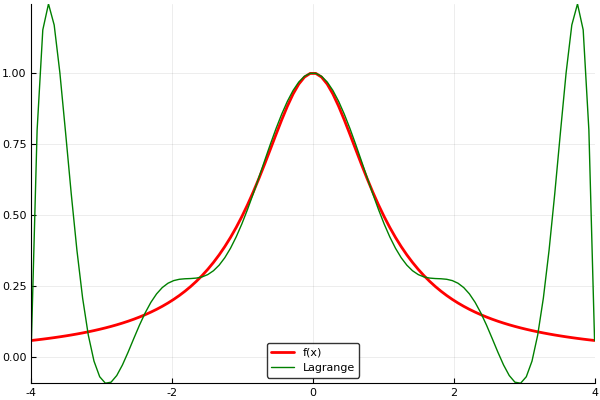

In [144]:
w1 = Werner_Lagrange(10, f, -4, 4)
x = linspace(-4,4, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = w1.(x)
plot!(x, y, color="green", label="Lagrange")


In [1]:
g(x) = sin(x)
a = 0; b = pi


π = 3.1415926535897...

In [19]:
function TQuad(f, n, a, b)
    h = (b - a)/n
    Tn = 0
    for k in 0:n
        if k == 0 || k == n
            Tn += f(a + k*h)/2
        else
            Tn += f(a + k*h)
        end
    end
    return Tn*h
end

TQuad (generic function with 1 method)

In [302]:
sinQ = quadgk(x -> g(x), 0, pi)[1]
@printf("%e\n",abs(2 - TQuad(g, 203, 0, pi))/2)

1.995851e-05


In [145]:
function STQuad(f, n, a, b)
    return 1/3 * (4*TQuad(f, n, a, b) - TQuad(f, n/2, a, b))
end

STQuad (generic function with 1 method)

In [305]:
@printf("%e\n",abs(2 - STQuad(g, 14, 0, pi))/2)

1.417178e-05


In [196]:
function SQuad(f, n, a, b)
    h = (b - a)/n
    m = n/2
    Sn1 = 0
    Sn2 = 0
    for k in 0:m
        if k == 0 || k == m
            Sn1 += f(a + 2*k*h)/2 
        else
            Sn1 += f(a + 2*k*h)
        end
        if k > 0
            Sn2 += f(a + (2*k-1)*h)
        end
    end
    return (Sn1*2 + Sn2*4)*(h/3)
end

SQuad (generic function with 1 method)

In [242]:
@printf("%e\n",abs(sinQ - SQuad(g, 12, 0, pi)))

5.262434e-05


In [278]:
sum = 0
sum1 = 0
sum2 = 0
a  = 0;b = 3
n  = 6
m  = n/2
h  = (b - a)/n
h2 = (b - a)/m
for k in 0:m
    if k == 0 || k == m
        sum  += f(a + 2*k*h)/2
        sum2 += f(a + k*h2) /2
    else
        sum  += f(a + 2*k*h)
        sum2 += f(a + k*h2)
    end
    if k != 0
        sum1 += f(a + (2*k-1)*h)
    end
end
sum *= 2
sum1 *= 4
##res = h*(sum+sum1) - STQuad(f, n, a, b)
h*sum - h2*sum2

0.0

In [174]:
sum = 0
sum1 = 0
sum2 = 0
a  = 0;b = 3
n  = 30
m  = n/2
h  = (b - a)/n
h2 = (b - a)/m
for k in 0:n/2
    if k == 0 || k == n/2
        sum  += f(a + 2*k*h)/2
    else
        sum  += f(a + 2*k*h)
    end
    if k != 0 || k != n
        sum1 += f(a + (2*k-1)*h)
    end
end
sum *= 2
sum1 *= 4
res = h/3*(sum + sum1 + sum - sum2)

1.5891999251526572

In [170]:
SQuad(f, n, a, b)

1.2490457404723276

In [178]:
h/3*(sum - sum2)

0.7446729984870037